In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import pyro
import pyro.distributions as dist
from pyro.infer.mcmc import HMC, NUTS
from pyro.infer.mcmc.api import MCMC

from torch.autograd import Variable
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt

import logging

pyro.set_rng_seed(42)


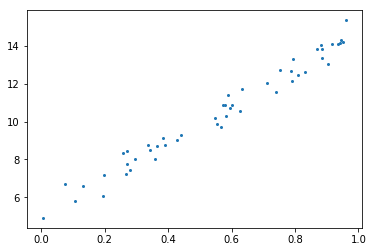

In [9]:
N = 50
x_data = torch.rand(N,1)
a, b, c = 10, 5, 1
sigma = 0.5
#y_data = a * x_data + b + c * torch.rand(x_data.size()) 
noise = torch.from_numpy(norm.rvs(loc=0, scale=sigma, size=N)).float()
y_data = a * x_data + b + noise.view(N,1)

plt.scatter(x_data.numpy(), y_data.numpy(), s=4)

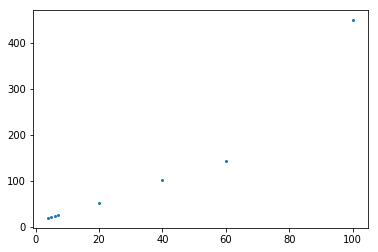

In [10]:
plt.scatter([4,5,6,7,20,40,60,100],[20,22,24,26,52,102,144,449], s=4)

In [11]:
print(level)

NameError: name 'level' is not defined

In [12]:
class NetModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):

        super(NetModel, self).__init__() 

#        self.linLayer1 = nn.Linear(input_dim, hidden_dim)
        self.linLayer1 = nn.Linear(input_dim, output_dim)
#        self.linLayer2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        output = self.linLayer1(x)

#        output = F.relu(self.linLayer1(x))
#        output = self.linLayer2(output)
        
        return output

In [13]:
net = NetModel(1,1,1)
print(net.state_dict())
global loss
loss = []

OrderedDict([('linLayer1.weight', tensor([[-0.9899]])), ('linLayer1.bias', tensor([-0.3864]))])


In [17]:
def model(x_data, y_data):
    
    global loss
    
    linLayer1_w_prior = dist.Normal(loc=torch.zeros_like(net.linLayer1.weight), scale=torch.ones_like(net.linLayer1.weight))
    linLayer1_b_prior = dist.Normal(loc=torch.zeros_like(net.linLayer1.bias), scale=torch.ones_like(net.linLayer1.bias))
    
 #   linLayer2_w_prior = dist.Normal(loc=torch.zeros_like(net.linLayer2.weight), scale=torch.ones_like(net.linLayer2.weight))
 #   linLayer2_b_prior = dist.Normal(loc=torch.zeros_like(net.linLayer2.bias), scale=torch.ones_like(net.linLayer2.bias))
    
    priors = {'linLayer1.weight': linLayer1_w_prior, 'linLayer1.bias': linLayer1_b_prior}

  #  priors = {'linLayer1.weight': linLayer1_w_prior, 'linLayer1.bias': linLayer1_b_prior, 'linLayer2.weight': linLayer2_w_prior, 'linLayer2.bias': linLayer2_b_prior}
    
    sigma = pyro.sample('sigma', dist.Uniform(0,1))
    
    lifted_module = pyro.random_module("module", net, priors)
    lifted_net = lifted_module()
    with pyro.plate("map", len(x_data)):
        prediction_mean = lifted_net(x_data)
    
        criterion = nn.MSELoss()
        loss.append(criterion(prediction_mean, y_data).data.numpy())
    
        pyro.sample("obs", dist.Normal(prediction_mean, sigma), obs=y_data)

In [18]:
nuts_kernel = NUTS(model)
logging.getLogger("pyro.infer.mcmc").setLevel(logging.INFO)
mcmc = MCMC(nuts_kernel, num_samples=100, warmup_steps=50)

In [19]:
mcmc.run(x_data, y_data)
mcmc.summary()

sample: 100%|██████████| 150/150 [00:10<00:00,  7.49it/s, step size=1.41e-02, acc. prob=0.953]



                                    mean       std    median      5.0%     95.0%     n_eff     r_hat
                         sigma      0.45      0.01      0.45      0.44      0.46     94.14      0.99
module$$$linLayer1.weight[0,0]      9.61      0.03      9.61      9.57      9.66      6.60      1.00
    module$$$linLayer1.bias[0]      5.11      0.02      5.11      5.08      5.13      6.70      1.01




In [20]:
len(loss)

4095

In [ ]:
plt.plot(loss[45700:])

In [5]:
#hmc_samples = {k: v.detach().cpu().numpy() for k, v in mcmc.get_samples().items()}
hmc_samples.keys()

NameError: name 'hmc_samples' is not defined

In [6]:
loss

NameError: name 'loss' is not defined

In [7]:
weight = hmc_samples['module$$$hidden.weight']
bias = hmc_samples['module$$$hidden.bias']
weight = weight.reshape(weight.shape[0])
bias =  bias.reshape(bias.shape[0])

NameError: name 'hmc_samples' is not defined